# Домашнее задание к лекции «Логистическая регрессия и дискриминационный анализ»

- Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
- Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
- Разделите данные на выборку для обучения и тестирования
- Постройте модель LDA
- Визуализируйте предсказания для тестовой выборки и центры классов
- Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
- Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию


In [75]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [96]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'pl', 'pw']).iloc[:,0:2]
variety = iris.target

df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [93]:
X_train, X_test, y_train, y_test = train_test_split(df, variety, test_size=0.25)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

result.head()

,0,1
0,1,2
1,0,0
2,2,1
3,0,0
4,0,0


In [94]:
accuracy_score(y_test, lda.predict(X_test))

0.7105263157894737

In [70]:
lda.coef_

array([[-5.40981434,  7.13421051],
       [ 1.22561774, -3.37073481],
       [ 3.99928542, -3.73892939]])

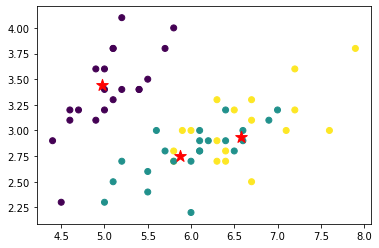

In [71]:
plt.scatter(X_test['sepal_length'], X_test['sepal_width'], c=y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

In [79]:
# строим график локтя

k_inertia = []

ks = range(1, 6)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df)
    k_inertia.append(clf_kmeans.inertia_)

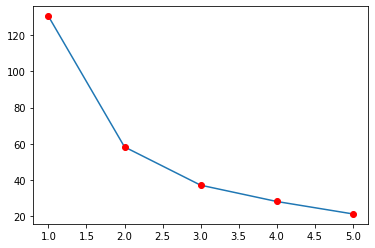

In [80]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

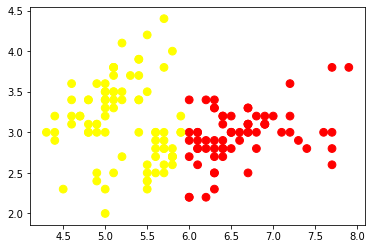

In [84]:
# Пробуем на 2-х кластерах

kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(df)
plt.scatter(df['sepal_length'], df['sepal_width'], cmap='autumn', c=clusters, s=60)

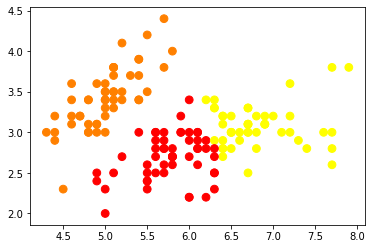

In [85]:
# И на 3-х кластерах

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df)
plt.scatter(df['sepal_length'], df['sepal_width'], cmap='autumn', c=clusters, s=60)

В задании не сказано, нужно ли писать какие-то выводы. 

По первой части (LDA): c учётом того, что дата сет маленький, и используются только два признака, точность на тестовой выборке достаточно высокая. Но она сильно меняется от выборки к выборке. Поэтому не уверена, что такая модель может быть полезна без других признаков. По визуализации один класс отделяется довольно точно, но остальные слишком смешаны.

По второй части (кластеры) по графику локтя может быть и 2 и 3 кластера. По визуализации больше похоже на три.